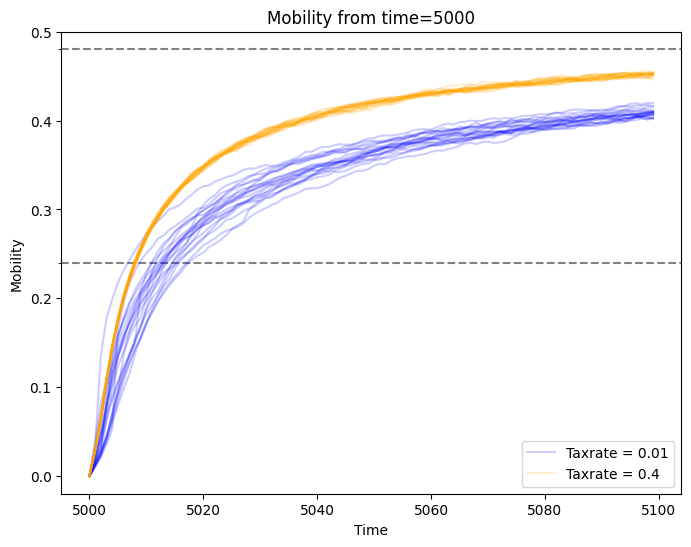

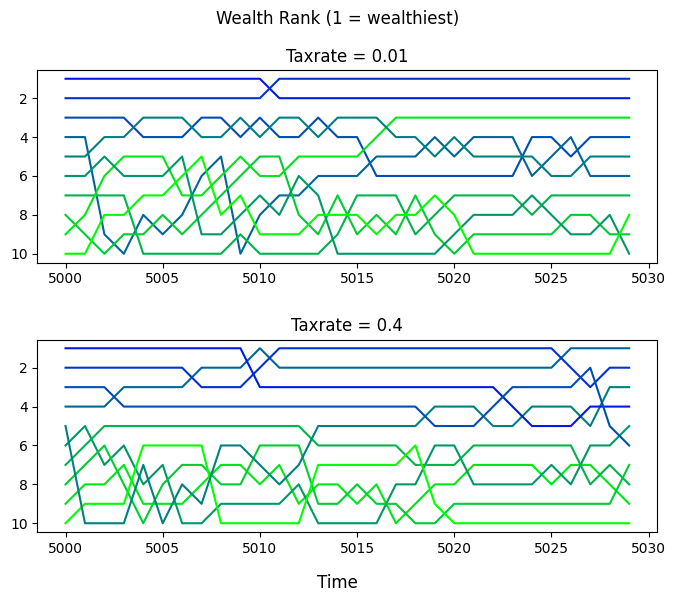

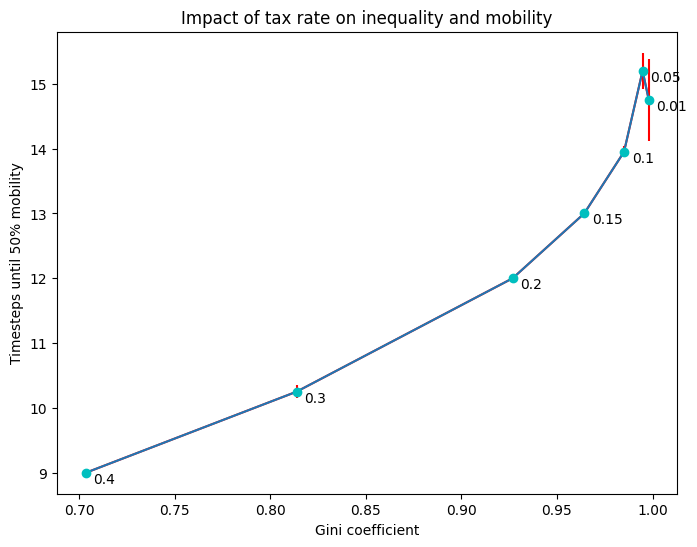

In [122]:
import numpy as np
import pandas
import matplotlib.pyplot as plt


def Q10():
    SimData = pandas.read_csv("https://www.cl.cam.ac.uk/teaching/current/SciComp/data/taxubi_summary.csv")
    Fig, Axes = plt.subplots(figsize=(8, 6))      
    
    OneArgs = {"color": "blue", "alpha" : 0.2}
    FortyArgs = {"color": "orange", "alpha" : 0.2}
    
    for i in range(0, 20):        
        Run = SimData[(SimData["run"] == i) & (SimData["metric"] == "mobility")]
        Axes.plot(Run["time"], Run["value"], **OneArgs)
        
    for i in range(120, 140):        
        Run = SimData[(SimData["run"] == i) & (SimData["metric"] == "mobility")]
        Axes.plot(Run["time"], Run["value"], **FortyArgs)        
        
    Axes.set_title("Mobility from time=5000")
    Axes.set_xlabel("Time")
    Axes.set_ylabel("Mobility")  
    Axes.set_ylim([-0.02,0.5])
        
    Axes.plot([], [], label="Taxrate = 0.01", **OneArgs)
    Axes.plot([], [], label="Taxrate = 0.4", **FortyArgs)
    
    Axes.set_axisbelow(True)    
    Axes.yaxis.grid(True, which="minor")
    Axes.set_yticks([0.24, 0.48], minor=True)
    Axes.tick_params(which="minor", grid_linewidth=1.5, grid_color="gray", grid_linestyle="dashed")
        
    Axes.legend(loc="lower right")
    plt.show()

def Q11():
    SimData = pandas.read_csv("https://www.cl.cam.ac.uk/teaching/current/SciComp/data/taxubi_sample.csv") 
    Days = 30
    
    StepGroupsLowTax = np.empty(Days, dtype = object)
    StepGroupsHighTax = np.empty(Days, dtype = object)
    
    for i, Person in SimData.iterrows():
        StepGroups = StepGroupsLowTax if Person["taxrate"] == 0.01 else StepGroupsHighTax
        Index = int(Person["time"]) - 5000
        if (Index < Days):
            if (StepGroups[Index] is None):
                StepGroups[Index] = []
            StepGroups[Index].append((int(Person["person_id"]), Person["wealth"]))
    
    PersonRankingsLow = np.empty(10, dtype = object)
    PersonRankingsHigh = np.empty(10, dtype = object)
    
    for i in range(0,10):
        PersonRankingsLow[i] = []
        PersonRankingsHigh[i] = []
    
    for i in range(0, len(StepGroupsLowTax)):        
        SortedGroup = sorted(StepGroupsLowTax[i], key=lambda tup: tup[1], reverse= True)
        for j, Person in enumerate(SortedGroup):
            PersonRankingsLow[Person[0]].append(j + 1)
            
    for i in range(0, len(StepGroupsHighTax)):        
        SortedGroup = sorted(StepGroupsHighTax[i], key=lambda tup: tup[1], reverse= True)
        for j, Person in enumerate(SortedGroup):
            PersonRankingsHigh[Person[0]].append(j + 1)        
        
    Fig, Axes = plt.subplots(2, figsize=(8, 6))   
    plt.subplots_adjust(hspace = 0.4)
    Fig.suptitle("Wealth Rank (1 = wealthiest)")        
    
    Range = np.arange(5000, 5000+Days)
    for Person in PersonRankingsLow:        
        Axes[0].plot(Range, Person, color=(0, 0.1 * Person[0], 1 - 0.1 * Person[0]))        
    for Person in PersonRankingsHigh:        
        Axes[1].plot(Range, Person, color=(0, 0.1 * Person[0], 1 - 0.1 * Person[0]))     
        
    Axes[0].set_title("Taxrate = 0.01")
    Axes[0].invert_yaxis()
    Axes[1].set_title("Taxrate = 0.4")
    Axes[1].invert_yaxis()
    Fig.supxlabel('Time')
    plt.show()


def Q12():
    SimData = pandas.read_csv("https://www.cl.cam.ac.uk/teaching/current/SciComp/data/taxubi_summary.csv")
    
    Ginis = SimData[SimData["metric"] == "gini"]
    Mobilities = SimData[SimData["metric"] == "mobility"]
    
    Taxrates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]  
    RunsPerRate = 20
    
    GiniMeans = np.empty(len(Taxrates))   
    GiniVariabilties = np.empty(len(Taxrates)) 
    
    for i, Rate in enumerate(Taxrates):
        GinisForRate = Ginis[Ginis["taxrate"] == Rate]["value"]
        GiniMeans[i] = np.mean(GinisForRate)
        GiniVariabilties[i] = np.std(GinisForRate) / np.sqrt(len(GinisForRate))
    
    Run = 0 
    ReachGoalTimes = np.empty(len(Taxrates), dtype=object)
    for i, Rate in enumerate(Taxrates):
        ReachGoalTimes[i] = np.empty(RunsPerRate)
        for j in range(0, RunsPerRate):
            Values = Mobilities[Mobilities["run"] == Run]["value"]
            Val = np.argmax(Values >= 0.25)
            ReachGoalTimes[i][j] = Val
            Run += 1            
        
    MobilityMeans = np.empty(len(Taxrates))
    MobilityVariabilties = np.empty(len(Taxrates))
    
    for i, TimeArray in enumerate(ReachGoalTimes):
        MobilityMeans[i] = np.mean(ReachGoalTimes[i])
        MobilityVariabilties[i] = np.std(ReachGoalTimes[i]) / np.sqrt(len(ReachGoalTimes[i]))
    
    Fig, Axes = plt.subplots(figsize=(8, 6))
    Axes.set_title("Impact of tax rate on inequality and mobility")
    Axes.set_xlabel("Gini coefficient")
    Axes.set_ylabel("Timesteps until 50% mobility")  
    
    Axes.errorbar(GiniMeans, MobilityMeans, MobilityVariabilties, GiniVariabilties, color = (1, 0, 0), zorder = 0)
    Axes.plot(GiniMeans, MobilityMeans, zorder = 1)
    Axes.scatter(GiniMeans, MobilityMeans, color = (0, 0.75, 0.75), zorder = 2)
    for i, (x, y) in enumerate(zip(GiniMeans, MobilityMeans)):
        plt.text(x + 0.004, y - 0.16, Taxrates[i])
    
    plt.show()
    

Q10()
Q11()
Q12()